In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt

In [2]:
# function to check validity of date
def check_date(dob,year, month, day, current_year, Age):
    if len(dob) != 8:
        print("provided date is not in current format please provide d-o-b again")
        return None
    
    leap =0
    
    if (year%400==0) | ((year%100!=0) &(year%4==0)): #check if year is leap year or not
        leap=1
    else:
        leap=0
    
# check all condition for date to be valid
    
    months_with_31_days = {1, 3, 5, 7, 8, 10, 12}
    months_with_30_days = {4,6,9,11}
    
    if month in months_with_31_days and 0<day <=31:
        return True
    elif leap==1 and month==2 and 0<day <=29:
        return True
    elif leap==0 and month==2 and 0<day <=28:
        return True
    elif month in months_with_30_days and 0<day <=30:
        return True
    else:
        print("provided date is not in current format please provide d-o-b again")
        return None
    

def calc_age(year, current_year): #calc age
    return (current_year-year)

def check_age(Age): #check age to see if its in range
    if Age <18:
        print("Age is below 18 years please provide d-o-b again")
        return None
    elif Age>60:
        print("Age is above 60 years please provide d-o-b again")
        return None
    else:
        return True

In [3]:
#Get current year
current_year = datetime.datetime.now().year
print(current_year)

2024


In [4]:
check=None
dob=0
Age=0

while check==None: #to take date of birth input and check if its valid input and age 
    dob = input("enter date in format of ddmmyyyy")
    year = int(dob[-4:])
    day = int(dob[:2])
    month= int(dob[2:4])
    Age= calc_age(year, current_year)
    check=check_date(dob, year, month, day, current_year, Age)
    if check== True:
        check=check_age(Age)

enter date in format of ddmmyyyy04021991


In [5]:

while True: #current asset of cost
    try:
        current_asset_cost = int(input("Enter the cost of asset at current in numbers: "))
        break
    except ValueError:
        print("Invalid input. Please enter the cost of asset at current in numbers.")

while True: #appreciation rate annualized
    try:
        appreciation_rate = float(input("Enter the rate at which cost of asset will rise each year, range(0,1): "))
        if 0 <= appreciation_rate <= 1:
            break  # Exit the loop if successful input
        else:
            print("Invalid input. Please enter a number between 0 and 1.")
    except ValueError:
        print("Invalid input. Please enter a number.")

        
while True: #donwpayment rate
    try:
        downpayment_rate = float(input("Enter the downpayment rate you are going to make, mininum should be 0.2, range(0.2,1): "))
        if 0.2 <= downpayment_rate <= 1:
            break
        else:
            print("Invalid input. Please enter a number between 0.2 and 1.")
    except ValueError:
        print("Invalid input. Please enter a number.")
        
        
while True: #registration rate
    try:
        registration_rate = float(input("Enter the registration rate you have to pay, normaly its 0.06 to 0.08, range(0,1): "))
        if 0 <= registration_rate <= 1:
            break
        else:
            print("Invalid input. Please enter a number between 0 and 1.")
    except ValueError:
        print("Invalid input. Please enter a number.")   

while True: #current investment value
    try:
        present_investment = int(input("Enter the current investment value in numbers: "))
        break
    except ValueError:
        print("Invalid input. Please enter the current investment value in numbers.")
        
while True: # return on investment expected annualized
    try:
        investment_return = float(input("Enter the annual return you expect on your investment, range(0,1): "))
        if 0 <= investment_return <= 1:
            break
        else:
            print("Invalid input. Please enter a number between 0 and 1.")
    except ValueError:
        print("Invalid input. Please enter a number.") 
        
while True: #monthly sip done
    try:
        monthly_investment = int(input("Enter the monthly investment value in numbers: "))
        break
    except ValueError:
        print("Invalid input. Please enter the monthly investment value in numbers.")

    
while True: # percentage at which sip will be increased annualized
    try:
        top_up = float(input("Enter the annualized top up you want to do, range(0,1): "))
        if 0 <= top_up <= 1:
            break
        else:
            print("Invalid input. Please enter a number between 0 and 1.")
    except ValueError:
        print("Invalid input. Please enter a number.") 
        

Enter the cost of asset at current in numbers: 15000000
Enter the rate at which cost of asset will rise each year, range(0,1): 0.06
Enter the downpayment rate you are going to make, mininum should be 0.2, range(0.2,1): 0.2
Enter the registration rate you have to pay, normaly its 0.06 to 0.08, range(0,1): 0.06
Enter the current investment value in numbers: 900000
Enter the annual return you expect on your investment, range(0,1): 0.12
Enter the monthly investment value in numbers: 20000
Enter the annualized top up you want to do, range(0,1): 0.05


In [29]:

working_year_left = 60-Age

year_list = [0]*working_year_left

for i in range(0, working_year_left): #create list of year from current to retirement age
    year_list[i] = current_year+i

asset_df = pd.DataFrame(year_list, columns=["Year"])  #create dataframe of asset cost calc

asset_df["initial_asset_cost"] = current_asset_cost
asset_df['row_number'] = range(0, len(asset_df))
asset_df["inflated_cost"] =0

for index, row in asset_df.iterrows():
    asset_df.loc[index, "inflated_cost"] = asset_df.loc[index, "initial_asset_cost"]*(1+appreciation_rate)
    asset_df.loc[index, "downpayment"] = asset_df.loc[index, "inflated_cost"]*downpayment_rate
    asset_df.loc[index, "registration_cost"] = asset_df.loc[index,"inflated_cost"]*registration_rate
    asset_df.loc[index,"Final_cost"] = asset_df.loc[index, "inflated_cost"] + asset_df.loc[index,"registration_cost"]
    
    if index != (asset_df.shape[0]-1):
          asset_df.loc[index + 1, "initial_asset_cost"] = asset_df.loc[index, "inflated_cost"]

investment_df = pd.DataFrame(year_list, columns=["Year"]) #create dataframe of investment value calc

investment_df["initial_investment"] = 0
investment_df.loc[0, "initial_investment"] = present_investment
investment_df['row_number'] = range(0, len(investment_df))
investment_df["new_investment"] = monthly_investment * 12 + monthly_investment * 12 * top_up * investment_df["row_number"]
investment_df["Total_invest"] = 0

for index, row in investment_df.iterrows(): #loop to calc total invest and make previous total invest as next year inital invest
    investment_df.loc[index, "Total_invest"] = (investment_df.loc[index, "initial_investment"] + investment_df.loc[index, "new_investment"]) * (1 + investment_return)
    if index != (investment_df.shape[0] - 1):
        investment_df.loc[index + 1, "initial_investment"] = investment_df.loc[index, "Total_invest"]
        


In [37]:
#combining both asset and investment datafrme
combined_data = pd.merge(asset_df, investment_df[["Year", "Total_invest"]], on="Year", how="inner") #combine both asset and invest dataframe

for index, row in combined_data.iterrows(): #loop to calc downpayemt year and final year
    if (combined_data.loc[index, "Total_invest"] - combined_data.loc[index, "downpayment"])>=0:
        combined_data.loc[index, "downpayment_year"] = combined_data.loc[index, "Year"]
    
    if (combined_data.loc[index, "Total_invest"] - combined_data.loc[index, "Final_cost"])>=0:
        combined_data.loc[index, "Final_year"] = combined_data.loc[index, "Year"]
    
downpayment_year = combined_data["downpayment_year"].min() #find first time downpayment able to do
Final_year = combined_data["Final_year"].min() # find first time able to buy in cash

print("As per your infomation year in which you will be able to pay downpayment: ", int(downpayment_year))
print("As per your infomation year in which you will be able to buy in full cash: ", int(Final_year))

As per your infomation year in which you will be able to pay downpayment:  2030
As per your infomation year in which you will be able to buy in full cash:  2050


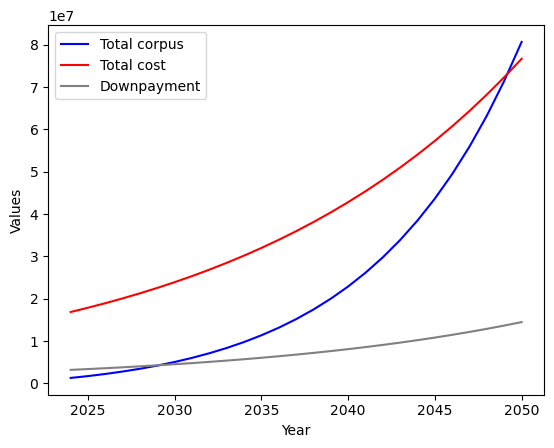

In [40]:
#plot final invest and final cost on year

plt.plot(combined_data["Year"], combined_data["Total_invest"], label="Total corpus", color='blue')
plt.plot(combined_data["Year"], combined_data["Final_cost"], label="Total cost", color='red')
plt.plot(combined_data["Year"], combined_data["downpayment"], label="Downpayment", color='Grey')

plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()

plt.show()